ॐ श्री गणेशाय नमः

In [1]:
from time import time
import math
def time_random():
    return time() - float(str(time()).split('.')[0])

def gen_random_range(min, max):
    return int(time_random() * (max - min) + min)

### Question-1

In [2]:
from time import time

In [3]:
def randomNumber(M, N):
    t = time() - float(str(time()).split('.')[0])
    random = t * (N - M) + M
    return round(random,2)

In [4]:
randomNumber(23, 70)

32.25

### Question-2

In [5]:
x=[]
y=[]
r=0
N = 10
i=0
while i!= N:
    R=int(randomNumber(23, 70))
    if R==r:
        for j in range(9999999):
            R
    else:
        r=R
        i= i+1
        x.append(i)
        y.append(r)

print(f"x :{x} \ny:{y}")

x :[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
y:[33, 24, 32, 51, 69, 45, 66, 32, 45, 53]


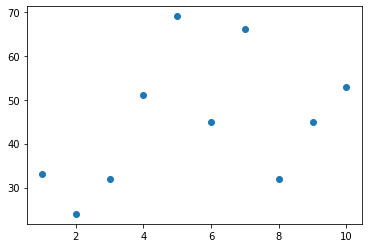

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

### Question-3

In [7]:
INTERVAL= 1000
  
circle_points= 0
square_points= 0
  
# Total Random numbers generated= possible x
# values* possible y values
for i in range(INTERVAL**2):
  
    # Randomly generated x and y values from a
    # uniform distribution
    # Range of x and y values is -1 to 1
    rand_x= round(randomNumber(-1, 1),1)
    rand_y=round(randomNumber(-1, 1),1)
    # Distance between (x, y) from the origin
    origin_dist= rand_x**2 + rand_y**2
  
    # Checking if (x, y) lies inside the circle
    if origin_dist<= 1:
        circle_points+= 1
  
    square_points+= 1
    # Estimating value of pi,
    # pi= 4*(no. of points generated inside the circle)/ (no. of points generated inside the square)
    pi = 4* circle_points/square_points
  
    #print(rand_x, rand_y, circle_points, square_points, "-", round(pi,2))
    #print("\n")
print("Final Estimation of Pi=", round(pi,2))  

Final Estimation of Pi= 3.02


In [8]:
import numpy as np
import pandas as pd

In [9]:
data = pd.read_csv("text_data.csv", encoding= 'unicode_escape', index_col = [0])

In [10]:
#data = pd.read_clipboard(index_col=[0])
data

,Message_body,Label
S.No.,,
1,"UpgrdCentre Orange customer, you may now claim...",Spam
2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
3,Congrats! Nokia 3650 video camera phone is you...,Spam
4,URGENT! Your Mobile number has been awarded wi...,Spam
5,Someone has contacted our dating service and e...,Spam
...,...,...
121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
122,Try to do something dear. You read something f...,Non-Spam
123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam


In [11]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#from gensim.utils import lemmatize

In [12]:
#pip install gensim

In [13]:
#nltk.download('stopwords') # comment out if already downloaded
nltk.download('punkt')     # comment out if already downloaded

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pawan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# convert to lower case
df = data.apply(lambda x: x.str.lower())

In [15]:
# replace special characters (preserving only space)
df = df.apply(lambda x: [re.sub('[^a-z0-9]', ' ', i) for i in x])

In [16]:
# tokenize columns 
df = df.apply(lambda x:[word_tokenize(i) for i in x])

In [17]:
# remove stop words from token list in each column
df = df.apply(
    lambda x: [
               [ w for w in tokenlist if w not in stopwords.words('english')] 
               for tokenlist in x])

In [18]:
# lemmatize columns
# the lemmatize method may fail during the first 3 to 4 iterations, 
# so try running it several times
for attempt in range(1, 11):
    try:
        print(f'Lemmatize attempt: {attempt}')
        df = df.apply(
            lambda x: [ [  l.decode('utf-8').split('/', 1)[0]
                         for word in tokenlist for l in lemmatize(word) ]
                       for tokenlist in x])
        print(f'Attempt {attempt} success!')
        break
    except:
        pass

Lemmatize attempt: 1
Lemmatize attempt: 2
Lemmatize attempt: 3
Lemmatize attempt: 4
Lemmatize attempt: 5
Lemmatize attempt: 6
Lemmatize attempt: 7
Lemmatize attempt: 8
Lemmatize attempt: 9
Lemmatize attempt: 10


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 1 to 125
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Message_body  125 non-null    object
 1   Label         125 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [20]:
df['Message_body'][125][0]

'great'

In [21]:
x=df['Message_body'].apply(lambda x: ", ".join(x))
y=df['Label'].apply(lambda x: " ".join(x))

In [22]:
x.head(-5)

S.No.
1      upgrdcentre, orange, customer, may, claim, fre...
2      loan, purpose, 500, 75, 000, homeowners, tenan...
3      congrats, nokia, 3650, video, camera, phone, c...
4      urgent, mobile, number, awarded, 2000, prize, ...
5      someone, contacted, dating, service, entered, ...
                             ...                        
116                                            awake, oh
117                                       think, da, wil
118    piss, talking, someone, realise, u, point, rea...
119                  hospital, da, return, home, evening
120                              gettin, rdy, ship, comp
Name: Message_body, Length: 120, dtype: object

In [23]:
y.head()

S.No.
1    spam
2    spam
3    spam
4    spam
5    spam
Name: Label, dtype: object

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer()
cv.fit(x)
cv_transform= cv.transform(x)

In [26]:
cv_transform

<125x984 sparse matrix of type '<class 'numpy.int64'>'
	with 1685 stored elements in Compressed Sparse Row format>

In [27]:
cv_transform.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
pd.DataFrame(cv_transform.toarray(), 
             columns=cv.get_feature_names_out()).head()

,000,0207,021,03,07046744435,07123456789,07732584351,07742676969,0800,08000839402,...,xxxx,ya,yahoo,year,years,yer,yes,yet,yo,yr
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

In [30]:
tf= TfidfTransformer()
tf_fit = tf.fit(cv_transform)
x_tf_transform = tf_fit.transform(cv_transform)

In [31]:
pd.DataFrame(x_tf_transform.toarray(),columns = cv.get_feature_names_out()).head()

,000,0207,021,03,07046744435,07123456789,07732584351,07742676969,0800,08000839402,...,xxxx,ya,yahoo,year,years,yer,yes,yet,yo,yr
0,0.000000,0.254955,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.201213,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.22553,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
clf = MultinomialNB()
Model=clf.fit(x_tf_transform, y)

In [34]:
Model.predict(cv.transform(
    ["Wow didn't think it was that common. I take it all back ur not a freak! Unless u chop it off:-)"]))

array(['non spam'], dtype='<U8')

In [35]:
Model.predict(cv.transform(
    ["You have lost 1 Millian $"]))

array(['spam'], dtype='<U8')

In [36]:
Model.predict(cv.transform(
    ["Your salary is debited to your account"]))

array(['spam'], dtype='<U8')

In [37]:
Model.predict(cv.transform(
    ["This is cat not dog"]))

array(['spam'], dtype='<U8')

In [38]:
Model.predict(cv.transform(
    ["This model is not good"]))

array(['non spam'], dtype='<U8')

In [39]:
Model.predict(cv.transform(
    ["Isq ne sathiya, mera Hala kya kar diya"]))

array(['spam'], dtype='<U8')

In [40]:
Model.predict(cv.transform(
    ["Describe the issue linked to the documentation.It is becoming increasingly difficult to work with different versions of the package due to the habit of scikit to force Deprecation and Future warning even for modules that are not directly called or invoked during execution. In particular I am working with the following environment"]))

array(['non spam'], dtype='<U8')

In [41]:
Model.predict(cv.transform(
    ["Isq ne sathiya, mera Hala kya kar diya"]))

array(['spam'], dtype='<U8')

In [42]:
Model.predict(cv.transform(
    ["Deprecated: Read and write audio files in AIFF or AIFC format."]))

array(['non spam'], dtype='<U8')

In [43]:
Model.predict(cv.transform(
    ["Command line option and argument parsing library"]))

array(['spam'], dtype='<U8')

In [44]:
Model.predict(cv.transform(
    ["piss, talking, someone, realise, u, point,"]))

array(['non spam'], dtype='<U8')

In [45]:
Model.predict(cv.transform(
    ["Dog,cat, bat",'Cat']))

array(['spam', 'spam'], dtype='<U8')

In [46]:
import pickle
pickle.dump(cv, open('cv.pkl', 'wb'))
pickle.dump(Model, open('Model.pkl', 'wb'))

In [47]:
pwd()

'E:\\Angel Al'

In [ ]:
from flask import Flask, render_template, request
import pickle

app = Flask(__name__, template_folder=r"E:\Angel Al\templates")
clf = pickle.load(open('Model.pkl', "rb"))
cv = pickle.load(open("cv.pkl", "rb"))


@app.route('/')
def Model():
    return render_template('Model.html')


@app.route('/Label', methods=['POST', 'GET'])
def Label():
    if request.method == 'POST':
        #HTML ->.py
        result = request.form['Data']
        result_pred = clf.predict(cv.transform([result]))
    #.py -> HTML
    return render_template("Label.html", result=result_pred)


if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)
127.0.0.1 - - [12/Apr/2022 18:40:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Apr/2022 18:40:37] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [12/Apr/2022 18:40:59] "POST /Label HTTP/1.1" 200 -
127.0.0.1 - - [12/Apr/2022 18:40:59] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
quit()